In [12]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pickle

data_path = os.path.join(os.path.dirname(os.path.dirname(os.path.realpath("__file__"))), "data")
fig_path = os.path.join(os.path.dirname(os.path.dirname(os.path.realpath("__file__"))), "figs")

def alpha(t, tau=1): return 1/tau**2*t*np.exp(-t/tau)

In [8]:
# spk_100_weights = np.loadtxt(os.path.join(data_path, "spk_train_weights_100.txt"))
def load_spk_train(N=100):
    with open(os.path.join(data_path, f"spk_train_{N}.pickle"), "rb") as f:
        spk_train = pickle.load(f)
    return spk_train

spk_100_weights = load_spk_train().weight_matrix

In [13]:
spk_100_weights

array([[-0.        ,  0.        , -0.        , ..., -0.        ,
        -0.07542694,  0.13477367],
       [-0.21159616, -0.        ,  0.26418988, ...,  0.        ,
         0.        ,  0.05258679],
       [ 0.45388138,  0.01677417,  0.        , ...,  0.        ,
         0.05413547,  0.19422857],
       ...,
       [ 0.        ,  0.13329454, -0.19971943, ..., -0.        ,
        -0.01998048, -0.        ],
       [-0.31990355, -0.        , -0.        , ..., -0.        ,
        -0.        , -0.        ],
       [-0.        , -0.24055423, -0.        , ...,  0.        ,
        -0.14581616,  0.        ]])

Text(0.5, 1.0, 'J_00')

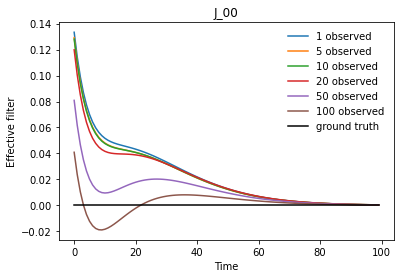

In [9]:
for obs in [1, 5, 10, 20, 50, 100]:
    filter = np.loadtxt(os.path.join(data_path, f"J00_basis_{obs}.txt"))
    plt.plot(filter, label=f"{obs} observed")
plt.plot(np.zeros_like(filter), linewidth=1.5, color='black', label="ground truth")
plt.legend(frameon=False)
plt.xlabel('Time')
plt.ylabel('Effective filter')
plt.title("J_00")

Text(0.5, 1.0, 'J_01')

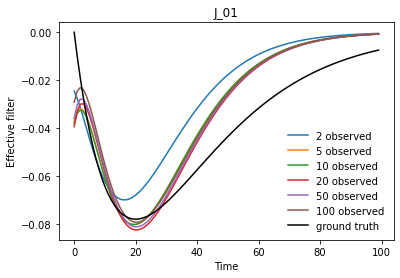

In [17]:
for obs in [2, 5, 10, 20, 50, 100]:
    filter = np.loadtxt(os.path.join(data_path, f"J01_basis_{obs}.txt"))
    plt.plot(filter, label=f"{obs} observed")

plt.plot(spk_100_weights[1, 0] * np.array([alpha(_) for _ in np.array(range(len(filter))) * 0.05]), linewidth=1.5, color='black', label="ground truth")
plt.legend(frameon=False)
plt.xlabel('Time')
plt.ylabel('Effective filter')
plt.title("J_01")